In [1]:
from dpm.models import LinearRegression, L1Regression, RidgeRegression, LassoRegression
import numpy as np
import matplotlib.pyplot as plt
from dpm.visualize import plot_stats
import torch

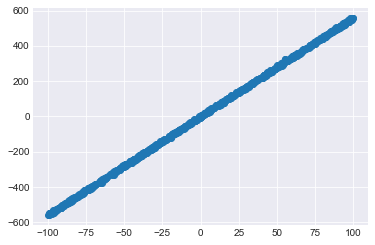

In [2]:
N = 1000

x = np.random.uniform(-100, 100, (N, 1))
w = 5.6
b = -1.2

y = w*x + b + np.random.normal(0, 4, (N, 1))
plt.scatter(x, y); plt.show()

In [8]:
model = LinearRegression()

In [9]:
[p.view(-1) for p in model.model.parameters()]

[tensor([-0.2003], grad_fn=<ViewBackward>),
 tensor([0.2548], grad_fn=<ViewBackward>)]

In [10]:
torch.cat([p.view(-1) for p in model.model.parameters()])

tensor([-0.2003,  0.2548], grad_fn=<CatBackward>)

In [6]:
stats = model.fit(x, y, epochs=1000, lr=0.1, batch_size=1024)

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
H

In [9]:
[p.view(-1) for p in model.model.parameters()]

[tensor([1.4447], grad_fn=<ViewBackward>),
 tensor([1.4385], grad_fn=<ViewBackward>)]

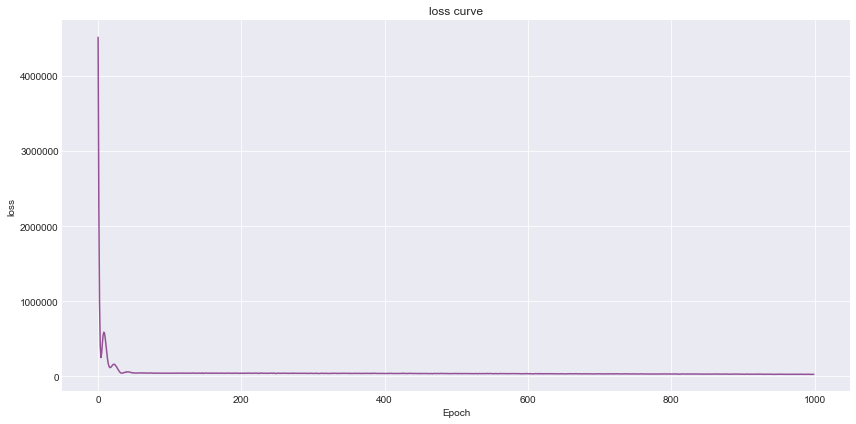

In [10]:
plot_stats(stats)

In [11]:
[p for p in model.model.parameters()]

[Parameter containing:
 tensor([[1.4447]], requires_grad=True), Parameter containing:
 tensor([1.4385], requires_grad=True)]

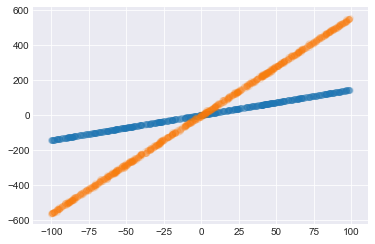

In [12]:
plt.scatter(x, model.model.output_layers[0](torch.Tensor(x)).detach(), alpha=0.1)
plt.scatter(x, y, alpha=0.1)
plt.show()

In [28]:
torch.Tensor(y)[:1]

tensor([[-288.1296]])

In [39]:
x, y = torch.tensor(x), torch.tensor(y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [40]:
model.sample(x)

tensor([[-2.7403e+02],
        [-4.0174e+02],
        [ 5.2688e+02],
        [ 3.2350e+02],
        [ 4.9941e+02],
        [-1.5752e+02],
        [-2.4591e+02],
        [ 2.3093e+02],
        [ 5.0585e+02],
        [-1.5551e+02],
        [-4.1478e+02],
        [-3.0782e+02],
        [-9.1231e+01],
        [-2.3646e+02],
        [-3.0544e+02],
        [ 1.8881e+02],
        [ 5.3978e+02],
        [-4.7948e+02],
        [-2.3121e+02],
        [ 1.4486e+02],
        [ 2.1241e+02],
        [ 4.8072e+02],
        [ 7.4272e+01],
        [-1.3645e+02],
        [-1.9992e+02],
        [-5.4725e+02],
        [ 8.5372e+01],
        [ 5.4182e+02],
        [ 6.3661e+01],
        [ 4.7005e+02],
        [-1.2426e+02],
        [ 4.8880e+02],
        [ 2.5495e+02],
        [ 5.5036e+02],
        [-4.1003e+02],
        [ 6.9342e+01],
        [-1.8227e+01],
        [-6.5601e+00],
        [ 9.2359e+01],
        [ 2.2858e+02],
        [ 5.4666e+02],
        [-5.2072e+02],
        [ 3.2028e+02],
        [-3